In [1]:
from dependencies.NN import *
from dependencies.LTL import *
from dependencies.Utility_funcs import *
from dependencies.maps import grid_world
from dependencies.RL_LTL import RL_LTL

from dependencies.csrl.mdp import GridMDP
from dependencies.csrl.oa import OmegaAutomaton
from dependencies.csrl import ControlSynthesis
import numpy as np

from matplotlib import pyplot as plt

2024-02-13 12:24:06.005550: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
for name in ['mine_craft_'+str(j) for j in range(9,10)]:
    print(name)
    gw = grid_world(name=name, plot=False, p=0.8)
    model = build_model(gw.ch_states[(0,0,0,0)].shape, gw.csrl.shape[-1])
    model.load_weights(f'outputs/models/{name}_p{gw.p}')
    env = RL_LTL(gw, model, danger_zone='d') # providing the danger zone is not a requirement but accelerates training

    env.train(100, smart_start=True)
    env.get_policy(1, reset_tables=False)


    with open(f'outputs/Ours/mine_craft/{name}_p{gw.p}.txt', 'w') as f:
        f.write('succ_rate:\n')
        f.write(', '.join(str(i) for i in env.policy_succ_rate))

        # f.write()

    model.save_weights(f'outputs/models/{name}_p{gw.p}')
    
    np.save(f'outputs/Ours/{name}_p{gw.p}', env.policy)

mine_craft_9


Number of Omega-automaton states (including the trap state): 7
##########################
C: 0.5 | tow: 0.2
0 ) MCTS conf: 0.6 , det: 1.0 | s: 54 LTL_f [+++]  LDBA [ 0.0 ] observed labels: [('gr',) ('tr',) ('ir',) ('ts',) ('ts',) ('fa',) ('fa',) ('wb',) ('wt',)
 ('gm',)]
Running 500 simulations with 50 time-steps...
Test finished with:
	success rate: 67 / 500 = 0.134
1 ) MCTS conf: 0.54 , det: 1.0 | s: 25 LTL_f [+++]  LDBA [ 0.0 ] observed labels: [('gr',) ('ir',) ('tr',) ('tr',) ('fa',) ('fa',) ('wb',) ('wt',) ('wt',)
 ('gm',)]
Running 500 simulations with 50 time-steps...
Test finished with:
	success rate: 224 / 500 = 0.448
2 ) MCTS conf: 0.6 , det: 0.98 | s: 86 LTL_f [+++]  LDBA [ 0.0 ] observed labels: [('ir',) ('tr',) ('gr',) ('ts',) ('ts',) ('ts',) ('fa',) ('fa',) ('wb',)
 ('wt',) ('gm',)]
Running 500 simulations with 50 time-steps...
Test finished with:
	success rate: 245 / 500 = 0.49
3 ) MCTS conf: 0.83 , det: 1.0 | s: 86 LTL_f [+++]  LDBA [ 0.0 ] observed labels: [('ir',) ('tr

In [9]:
for name in ['mine_craft_'+str(j) for j in range(10,11)]:
    print(name)
    gw = grid_world(name=name, plot=False, p=0.8)
    model = build_model(gw.ch_states[(0,0,0,0)].shape, gw.csrl.shape[-1])
    model.load_weights(f'outputs/models/{name}_p{gw.p}')
    env = RL_LTL(gw, model, danger_zone='wt') # providing the danger zone is not a requirement but accelerates training

    env.train(100, smart_start=True, stop_acc=0.98)
    env.get_policy(1, reset_tables=False)

    with open(f'outputs/Ours/mine_craft/{name}_p{gw.p}.txt', 'w') as f:
        f.write('succ_rate:\n')
        f.write(', '.join(str(i) for i in env.policy_succ_rate))

        # f.write()

    model.save_weights(f'outputs/models/{name}_p{gw.p}')
    np.save(f'outputs/Ours/{name}_{gw.p}', env.policy)

0 ) MCTS conf: 0.84 , det: 1.0 | s: 94 LTL_f [+++]  LDBA [ 0.0 ] observed labels: [('tr',) ('wb',) ('ir',) ('ir',) ('wb',) ('ts',) ('or',)]
Test wins: 1 / 1
Running 1000 simulations with 50 time-steps...
Test finished with:
	success rate: 946 / 1000 = 0.946


In [12]:
print(f'outputs/Ours/mine_craft_{name}_{gw.p}')

outputs/Ours/mine_craft_mine_craft_10_0.8


Number of Omega-automaton states (including the trap state): 7


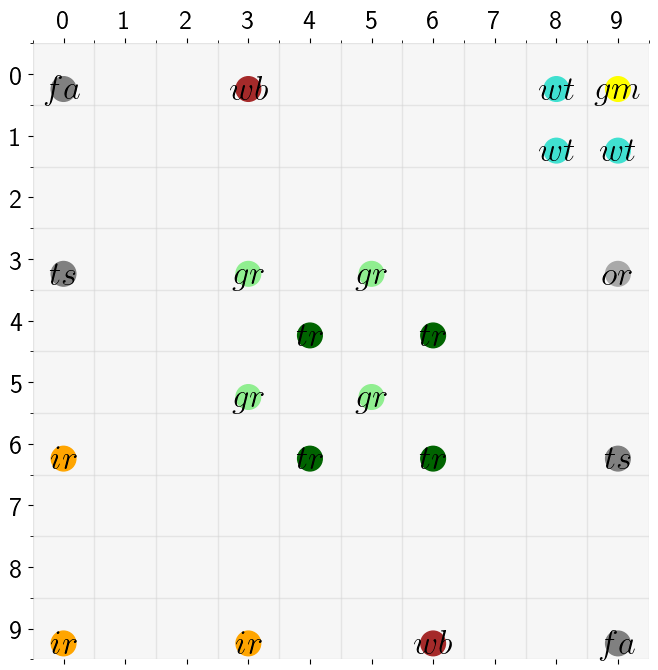

In [2]:
gw = grid_world(name='mine_craft_9')

In [17]:
model = build_model(gw.ch_states[(0,0,0,0)].shape, gw.csrl.shape[-1])
# print(model.summary())
# model.load_weights(f'outputs/models/New_p{gw.p}')
env = RL_LTL(gw, model)

In [14]:
env.train(20, smart_start=True)
# env.gw.predicates
env.get_policy(1, reset_tables=False)

##########################
C: 0.5 | tow: 0.1


0 ) MCTS conf: -0.41 , det: 1.0 | s: 12 LTL_f [---]  LDBA [ 0.0 ] observed labels: []
Running 100 simulations with 40 time-steps...
Test finished with:
	success rate: 0 / 100 = 0.0
['0,1' '0,2' '0,4' '0,5' '0,6' '0,7' '1,0' '1,1' '1,2' '1,3' '1,4' '1,5'
 '1,6' '1,7' '2,0' '2,1' '2,2' '2,3' '2,4' '2,5' '2,6' '2,7' '2,8' '2,9'
 '3,1' '3,2' '3,4' '3,6' '3,7' '3,8' '4,0' '4,1' '4,2' '4,3' '4,5' '4,7'
 '4,8' '4,9' '5,0' '5,1' '5,2' '5,4' '5,6' '5,7' '5,8' '5,9' '6,1' '6,2'
 '6,3' '6,5' '6,7' '6,8' '7,0' '7,1' '7,2' '7,3' '7,4' '7,5' '7,6' '7,7'
 '7,8' '7,9' '8,0' '8,1' '8,2' '8,3' '8,4' '8,5' '8,6' '8,7' '8,8' '8,9'
 '9,1' '9,2' '9,4' '9,5' '9,7' '9,8'] (3, 8)
1 ) MCTS conf: 0.07 , det: 1.0 | s: 38 LTL_f [---]  LDBA [ 0.0 ] observed labels: [('gr',) ('tr',) ('gr',) ('tr',) ('ir',) ('ir',) ('ir',) ('wb',) ('fa',)
 ('fa',) ('wb',)]
Running 100 simulations with 40 time-steps...
Test finished with:
	success rate: 0 / 100 = 0.0
['0,1' '0,2' '0,4' '0,5' '0,6' '0,7' '1,0' '1,1' '1,2' '1,3' '1,4' '

KeyboardInterrupt: 

In [4]:
env.Q[0,0,1,7]

array([-0.44146176, -0.5       , -0.42868463, -0.5       ,  0.        ,
        0.        ,  0.        ,  0.        ])

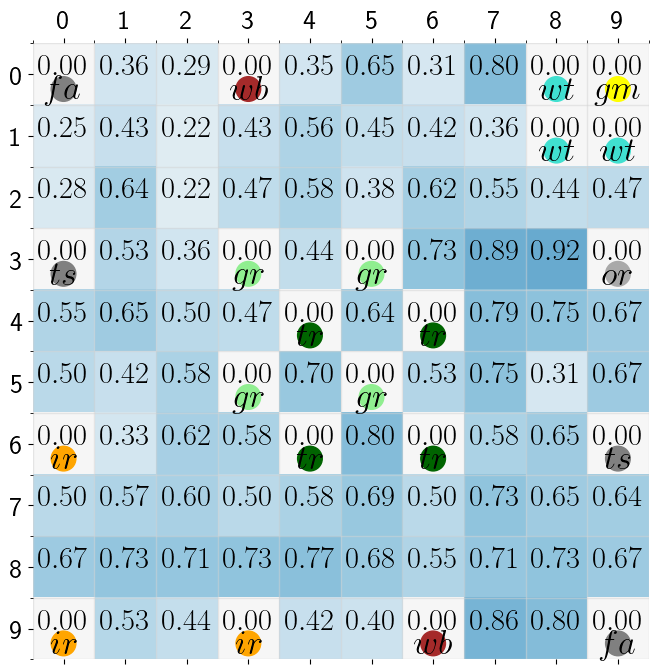

In [8]:
gw.mdp.plot(value=env.rew_table)

In [10]:
type([])=='list'

False

In [8]:
env.evaluate(verbose=0, len=50, runs=1, start=(0,7))

Running 1 simulations with 50 time-steps...
Test finished with:
	success rate: 0 / 1 = 0.0


In [11]:
env.evaluate(verbose=0, len=40, runs=1, animation="outputs/gifs/mine_craft_10")

Running 1 simulations with 40 time-steps...


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Test finished with:
	success rate: 1 / 1 = 1.0


frame=   39 fps= 31 q=-1.0 Lsize=      84kB time=00:00:12.00 bitrate=  57.2kbits/s speed=9.67x    
video:83kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 1.573387%
[libx264 @ 0x55ed2d9dd480] frame I:1     Avg QP: 8.72  size: 36573
[libx264 @ 0x55ed2d9dd480] frame P:10    Avg QP:15.99  size:  2208
[libx264 @ 0x55ed2d9dd480] frame B:28    Avg QP:17.00  size:   900
[libx264 @ 0x55ed2d9dd480] consecutive B-frames:  2.6%  0.0% 15.4% 82.1%
[libx264 @ 0x55ed2d9dd480] mb I  I16..4: 58.9%  5.1% 36.0%
[libx264 @ 0x55ed2d9dd480] mb P  I16..4:  0.3%  0.9%  2.1%  P16..4:  2.3%  0.2%  0.2%  0.0%  0.0%    skip:94.0%
[libx264 @ 0x55ed2d9dd480] mb B  I16..4:  0.0%  0.1%  0.7%  B16..8:  4.9%  0.1%  0.0%  direct: 0.0%  skip:94.1%  L0:54.5% L1:45.2% BI: 0.3%
[libx264 @ 0x55ed2d9dd480] 8x8 transform intra:11.5% inter:21.7%
[libx264 @ 0x55ed2d9dd480] coded y,u,v intra: 27.5% 9.7% 10.9% inter: 0.3% 0.1% 0.1%
[libx264 @ 0x55ed2d9dd480] i16 v,h,dc,p: 74% 25%  1%  0%
[libx264 @ 

In [ ]:
model.save_weights(f'outputs/models/New_p{gw.p}')

In [ ]:
N1 = np.load(f'outputs/Ours/New_p{gw.p}.npy')

In [ ]:
policy2=np.argmax(env.N,axis=4)
value2=np.max(env.N,axis=4)
# np.save(f'outputs/Ours/New_p{env.p}', env.N)

In [ ]:
episodes, rew = run_Q_test(gw.csrl, policy2, gw.LTL_formula, gw.predicates, start=None, T=50, runs=1000, verbose=0, reachability=True)

In [ ]:
rew.sum()

In [ ]:
gw.mdp.plot(policy=policy2[0, 0])

In [ ]:
csrl.mdp.label[3,0]

In [ ]:
(W[state])/N[state]

In [ ]:
state = (0, 0, 4, 3)
print([round(i,2) for i in Q[state][:6]])
print([round(i,2) for i in W[state][:6]])
print([round(i,2) for i in N1[state][:8]])
csrl.transition_probs[(state)][2]

In [ ]:
for name in ['mine_craft_'+str(j) for j in range(9,10)]:
    print(name)
    gw = grid_world(name=name, plot=False, p=0.8)
    model = build_model(gw.ch_states[(0,0,0,0)].shape, gw.csrl.shape[-1])
    env = RL_LTL(gw, model, danger_zone='d') # providing the danger zone is not a requirement but accelerates training
    
    env.train(100, smart_start=True)
    env.get_policy(1, reset_tables=False)

    with open(f'outputs/Ours/mine_craft/{name}_p{gw.p}.txt', 'w') as f:
        f.write('succ_rate:\n')
        f.write(', '.join(str(i) for i in env.policy_succ_rate))

        # f.write()

    model.save_weights(f'outputs/models/{name}_p{gw.p}')


In [ ]:
Q =gw.csrl.q_learning(T=100,K=100000)
np.save(f'outputs/CSRL/New_p{gw.p}', Q)

In [ ]:
policy1=np.argmax(Q,axis=4)
value1=np.max(Q,axis=4)

In [ ]:
gw.mdp.plot(policy=policy1[0, 0])

In [ ]:
episodes, rew = run_Q_test(gw.csrl, policy1, gw.LTL_formula, gw.predicates, start=None, T=50, runs=1000, verbose=0, reachability=True)

In [ ]:
visited_states_train = []
visited_states_test = []
LTL_coef = 10

search_depth = 30
MCTS_samples = 100

num_training_epochs =  30
num_test_epochs = 10
training = True
epochs = 10
T = [25]
K = 1
batch_size = 32
steps_per_epoch = 4

success_rates = []
succes_std = []
win_hist = []
train_history = []

os.remove("Log_run.txt")
for i in T:
    # TRAIN ##############################
    train_wins = 0
    # num_training_epochs = int(200 - 1.9*i)
    # model = build_model(ch_states[(0,0,0,0)].shape, csrl.shape[-1])
    N, W, Q, P, visited_train = np.zeros(csrl.shape), np.zeros(csrl.shape), np.zeros(csrl.shape), np.zeros(csrl.shape), set()
    for epoch in range(num_training_epochs):
        t1 = time.time()
        print(Q[(0,0,0,0)][:4], len(visited_train))
        state_history, channeled_states, trajectory, action_history, reward_history, better_policy = MC_learning(csrl, model, LTL_formula,
                predicates, csrl.reward, ch_states, N = N, W = W, Q = Q, P = P, C=0.5, tow=1, n_samples=MCTS_samples, visited=visited_train,
                start=(0,0), search_depth=search_depth, verbose=0, T=i, K=K, run_num=epoch, ltl_f_rew=False)
        
        # print('N',N[(0,0,4,1)][:5])
        visited_states_train += state_history
        t2 = time.time()
        # print(t2-t1, " run episode")

        # win = check_LTL(LTL_formula, trajectory, predicates)[0]
        if reward_history[-1]>0: train_wins+=1

        if training and len(action_history)>0:
            if epoch==0:
                x_train = np.array(channeled_states)[:-1]
                y1_train = np.array(better_policy)
                y2_train = np.array(reward_history) + LTL_coef*reward_history[-1]
                # y2_train = np.array(reward_history)
                y2_train = y2_train[:-1]
            else:
                x_train = np.concatenate((x_train, np.array(channeled_states)[:-1]),0)
                y1_train = np.concatenate((y1_train, np.array(better_policy)),0)
                y2_train_curr = np.array(reward_history) + LTL_coef*reward_history[-1]
                # y2_train_curr = np.array(reward_history)
                y2_train = np.concatenate((y2_train, y2_train_curr[:-1]),0)
            t3= time.time()
            # print(t3-t2, " build database")
            tr_hist = model.fit(x_train, [y1_train, y2_train], epochs=epochs, batch_size=batch_size,
                                steps_per_epoch=steps_per_epoch if len(x_train)>steps_per_epoch*epochs*batch_size else None, verbose=0)
            train_history += tr_hist.history['loss']
        # win_hist.append(win)
        t4 = time.time()
        # print(t4-t3, "fit", len(x_train))
    print("Train wins:",train_wins,"/", num_training_epochs)

    # TEST ##############################
    test_wins = 0
    N, W, Q, P, visited_test = np.zeros(csrl.shape), np.zeros(csrl.shape), np.zeros(csrl.shape), np.zeros(csrl.shape), set()
    for epoch in range(num_test_epochs):
        
        state_history, channeled_states, trajectory, action_history, reward_history, better_policy = MC_learning(csrl, model, LTL_formula,
                predicates, csrl.reward, ch_states, N = N, W = W, Q = Q, P = P, C=1, tow=1, n_samples=MCTS_samples, visited=visited_test,
                start=(0,0), search_depth=search_depth, verbose=0, T=i, K=1, NN_value_active=True)

        # win = check_LTL(LTL_formula, trajectory, predicates)[0]
        win = reward_history[-1]
        if win: test_wins+=1
        win_hist.append(win)
        visited_states_test += state_history
        
    success_rates.append(100*test_wins/num_test_epochs)
    temp = np.zeros(num_test_epochs)
    temp[:test_wins]=1
    std = np.sqrt(num_test_epochs*np.var(temp))
    succes_std.append((success_rates[-1]-std, success_rates[-1]+std))
    ###############################################################
    print("Test wins:",test_wins,"/",num_test_epochs)
    # print("last reward:", reward_history[-1], "  | trajectory:", trajectory)
    # print("Actions:", action_history)

encode_visited_states_test = [i[1]*csrl.shape[-2]*csrl.shape[-3]+i[2]*csrl.shape[-2]+i[3] for i in visited_states_test]
encode_visited_states_train = [i[1]*csrl.shape[-2]*csrl.shape[-3]+i[2]*csrl.shape[-2]+i[3] for i in visited_states_train]

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(encode_visited_states_train, bins=range(total_number_of_states), density=True, alpha=0.5, label="train")
plt.title("MCTS - histogram of visited states during train and test")
plt.xlabel("space state")

plt.hist(encode_visited_states_test, bins=range(total_number_of_states), density=True, alpha=0.5, label="test")
plt.legend()

print("exploration in training:", round(np.unique(encode_visited_states_train).shape[0]/total_number_of_states, 2))
print("exploration in testing:", round(np.unique(encode_visited_states_test).shape[0]/total_number_of_states, 2))

In [ ]:
succes_std = np.array(succes_std)

plt.figure(figsize=(7,4))
plt.fill_between(T, succes_std[:,0], succes_std[:,1], alpha=0.3, label="MCTS area of 1 STD")

plt.plot(T, success_rates)
plt.xlabel("length of trajectory (T)")
plt.ylabel(f"succes rate (out of {num_test_epochs} runs)")
plt.title("MCTS performance results on the custom gridworld, P="+str(p))
success_rates

In [ ]:
interval = 400
plt.figure(figsize=(7,4))
plt.plot(train_history)
plt.title("training loss")
# plt.xticks(range(1,num_training_epochs*epochs,interval), range(0,num_training_epochs,interval//epochs));

In [ ]:
Q, visited_states =csrl.q_learning(T=100,K=10000)
np.save(f'outputs/CSRL/SD_{p}', Q)

In [ ]:
policy=np.argmax(Q,axis=4)
value=np.max(Q,axis=4)

In [ ]:
rewards_mean = []
rewards_std = []
n_runs = 100

T = [26, 50, 75, 100, 150, 200, 300, 400]

for i in T:
    episodes, rew = run_Q_test(csrl, policy, LTL_formula, predicates, T=i, start=(0,0), runs=n_runs, verbose=0)
    rewards_mean.append(100*np.mean(rew))
    rewards_std.append((rewards_mean[-1]-np.sqrt(n_runs*np.var(rew)), rewards_mean[-1]+np.sqrt(n_runs*np.var(rew))))
rewards_std = np.array(rewards_std)

In [ ]:
plt.figure(figsize=(7,4))

plt.fill_between(T, rewards_std[:,0], rewards_std[:,1], alpha=0.3)
plt.plot(T, rewards_mean, label="CSRL")
plt.xlabel("length of trajectory (T)")
plt.ylabel("succes rate")
plt.title("Comparison on the sequentil delivery case, P="+str(p))
plt.ylim(-10, 110)

plt.fill_between(T, succes_std[:,0], succes_std[:,1], alpha=0.3)
plt.plot(T, success_rates, label="RL-LTL")
plt.legend()